In [1]:
import os
import sys

cwd = os.getcwd()

root_folder = os.sep+"team-project"
sys.path.insert(0, cwd[:(cwd.index(root_folder)+len(root_folder))] + os.sep+"utils"+os.sep)

from hfpn import HFPN
from visualisation import Analysis
#import HFPN

from validation_data import *
from initial_tokens import *
from rate_functions import *

from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np

#import AD_Simulation_Definitions

In [8]:
analysis = {}
analysis['healthy'] = Analysis.load_from_file('integrated_healthy_1mil')
#analysis['ApoE'] = Analysis.load_from_file('integrated_ApoE_1mil')
#analysis['LRRK2'] = Analysis.load_from_file('integrated_LRRK2_1mil')
analysis['NPC1'] = Analysis.load_from_file('integrated_NPC1_1mil')
#analysis['ADandADdrug'] = Analysis.load_from_file("integrated_ADwithADdrug_1mil")
#analysis['ADandPDdrug'] = Analysis.load_from_file("integrated_ADwithPDdrug_1mil")
#analysis['ADandNPCDdrug'] = Analysis.load_from_file("integrated_ADwithNPCdrug_1mil")
#analysis['PDandADdrug'] = Analysis.load_from_file("integrated_PDwithADdrug_1mil")
#analysis['PDandPDdrug'] = Analysis.load_from_file("integrated_PDwithPDdrug_1mil")
#analysis['PDandNPCDdrug'] = Analysis.load_from_file("integrated_PDwithNPCdrug_1mil")
analysis['NPCDandADdrug'] = Analysis.load_from_file("integrated_NPCDwithADdrug_1mil")
analysis['NPCDandPDdrug'] = Analysis.load_from_file("integrated_NPCDwithPDdrug_1mil")
analysis['NPCDandNPCDdrug'] = Analysis.load_from_file("integrated_NPCDwithNPCdrug_1mil")

In [3]:
FIGURESIZE = (8,6)

In [13]:
def create_plot(analysis, input_place_list, place_labels, mutation_list, mutation_labels, plot_title, log = False):
    
    t=np.arange(0,1000.001,0.001)
    fig,ax=plt.subplots(figsize = FIGURESIZE)
    linestep = 0.4
    line_width = 3
    
    for i, mutation in enumerate(mutation_list):
        for place, place_label in zip(input_place_list, place_labels):
            data = analysis[mutation].mean_token_history_for_places([place])[0:1000001]
            if place_label == "" and i>=2:
                ax.plot(t, data, label = mutation_labels[i], linewidth = line_width- i*linestep)
            elif place_label == "":
                ax.plot(t, data, label = mutation_labels[i], linewidth = line_width- i*linestep)    
            else:
                ax.plot(t, data, label = mutation_labels[i]+' - '+place_label, linewidth = line_width- i*linestep)
    
    ax.legend()
    Analysis.standardise_plot(ax, title = plot_title, xlabel = "Time (s)",ylabel = "Molecule count")
    
    if log:
        ax.set_yscale('log')
        ax.set_yticks([100000,1000000])
        
    plt.tight_layout() 
    plt.show()
    

### AD diseased state

In [ ]:
create_plot(analysis, 
            input_place_list = ['p_Ab'], 
            place_labels = [""], 
            mutation_list = ['healthy','ApoE','ADandADdrug','ADandPDdrug','ADandNPCDdrug'], 
            mutation_labels = ['Healthy','ApoE','ApoE, AD therapeutic','ApoE, PD therapeutic','ApoE, NPCD therapeutic'],
            plot_title = r"Integrated model therapeutics - Amyloid-$\beta$ peptide",
            log = True)
create_plot(analysis, 
            input_place_list = ['p_cas3'], 
            place_labels = [""], 
            mutation_list = ['healthy','ApoE','ADandADdrug','ADandPDdrug','ADandNPCDdrug'], 
            mutation_labels = ['Healthy','ApoE','ApoE, AD therapeutic','ApoE, PD therapeutic','ApoE, NPCD therapeutic'],
            plot_title = "Integrated model therapeutics - Active Caspase-3",
            log = False)

### PD diseased state

In [ ]:
create_plot(analysis, 
            input_place_list = ['p_LB'], 
            place_labels = [""], 
            mutation_list = ['healthy','LRRK2','PDandADdrug','PDandPDdrug','PDandNPCDdrug'], 
            mutation_labels = ['Healthy','LRRK2','LRRK2, AD therapeutic','LRRK2, PD therapeutic','LRRK2, NPCD therapeutic'],
            plot_title = "Integrated model therapeutics - Lewy bodies",
            log = False)
create_plot(analysis, 
            input_place_list = ['p_cas3'], 
            place_labels = [""], 
            mutation_list = ['healthy','LRRK2','PDandADdrug','PDandPDdrug','PDandNPCDdrug'], 
            mutation_labels = ['Healthy','LRRK2','LRRK2, AD therapeutic','LRRK2, PD therapeutic','LRRK2, NPCD therapeutic'],
            plot_title = "Integrated model therapeutics - Active Caspase-3",
            log = False)

### NPCD diseased state

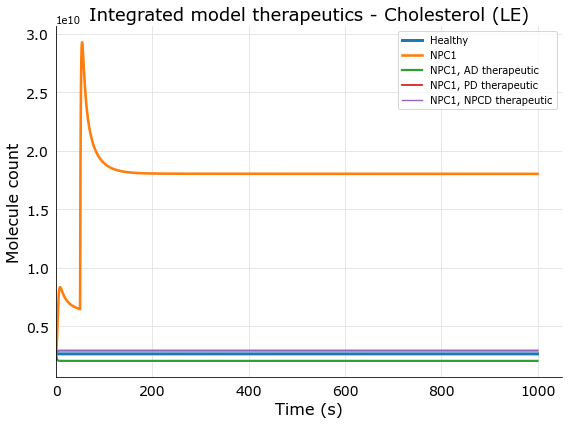

In [14]:
create_plot(analysis, 
            input_place_list = ['p_chol_LE'], 
            place_labels = [""], 
            mutation_list = ['healthy','NPC1','NPCDandADdrug','NPCDandPDdrug','NPCDandNPCDdrug'], 
            mutation_labels = ['Healthy','NPC1','NPC1, AD therapeutic','NPC1, PD therapeutic','NPC1, NPCD therapeutic'],
            plot_title = "Integrated model therapeutics - Cholesterol (LE)",
            log = False)
#create_plot(analysis, 
#            input_place_list = ['p_cas3'], 
#            place_labels = [""], 
#            mutation_list = ['healthy','NPC1','NPCDandADdrug','NPCDandPDdrug','NPCDandNPCDdrug'], 
#            mutation_labels = ['Healthy','NPC1','NPC1, AD therapeutic','NPC1, PD therapeutic','NPC1, NPCD therapeutic'],
#            plot_title = "Integrated model therapeutics - Active Caspase-3",
#           log = False)